This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

#Adding random noise with size of len(train_images) using np.random.random we take random value matric of the size len...
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

#Adding 0 vectors
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#original dimension
train_images.shape 

(60000, 784)

In [3]:
#we want to add this size of random noise to the original training dataset
(len(train_images), 784)

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
np.random.random((len(train_images), 784))

array([[0.01675526, 0.60610026, 0.82291268, ..., 0.45221824, 0.83034688,
        0.38291181],
       [0.8683715 , 0.15331478, 0.80765151, ..., 0.52867636, 0.35760709,
        0.7303782 ],
       [0.06160073, 0.17940989, 0.64246732, ..., 0.97387408, 0.26126295,
        0.09349198],
       ...,
       [0.04106903, 0.2096837 , 0.40706365, ..., 0.05516666, 0.9137041 ,
        0.14312474],
       [0.39423096, 0.46709035, 0.54084337, ..., 0.95885745, 0.96806881,
        0.05380409],
       [0.54981259, 0.46920527, 0.56450583, ..., 0.89567434, 0.49803407,
        0.31813044]])

In [6]:
train_images, np.zeros((len(train_images), 784))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#training
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#plot the history
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 10ms/step - loss: 0.6023 - accuracy: 0.8143 - val_loss: 0.2489 - val_accuracy: 0.9253
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2462 - accuracy: 0.9240 - val_loss: 0.1668 - val_accuracy: 0.9512
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1621 - accuracy: 0.9494 - val_loss: 0.1505 - val_accuracy: 0.9572
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1160 - accuracy: 0.9631 - val_loss: 0.1494 - val_accuracy: 0.9564
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0859 - accuracy: 0.9726 - val_loss: 0.1293 - val_accuracy: 0.9615
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.1863 - val_accuracy: 0.9457
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.1075 - val_accuracy: 0.9706
Epoc

In [8]:
#training data with original data
#The performance is a little better if we look at the accuracy
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.2886 - accuracy: 0.9165 - val_loss: 0.1486 - val_accuracy: 0.9576
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1195 - accuracy: 0.9646 - val_loss: 0.1096 - val_accuracy: 0.9689
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9763 - val_loss: 0.1048 - val_accuracy: 0.9668
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.0891 - val_accuracy: 0.9741
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0838 - val_accuracy: 0.9748
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0804 - val_accuracy: 0.9773
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0233 - accuracy: 0.9935 - val_loss: 0.0801 - val_accuracy: 0.9774
Epoch 

**Plotting a validation accuracy comparison**

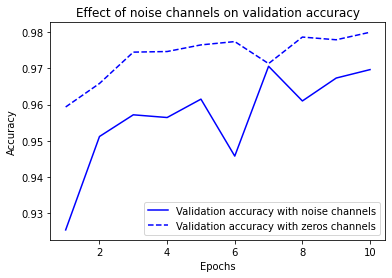

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#if we had the random noise, it will cause suspisious correlation and perofrmance goes down. 
#not recommended to add random noise in classification

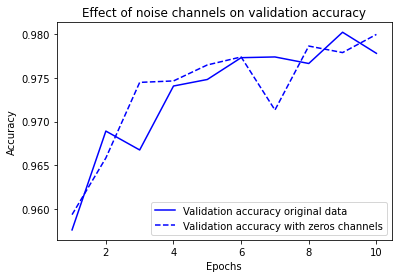

In [10]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#the 2 validation are quite similar

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
#the accuracy is increasing with the epochs. The validation accuracy is constant at 10%
#in this case it's overfitting compare to the dataset
#If validation accuracy is not increasing then we should review dataset & model

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3169 - accuracy: 0.1014 - val_loss: 2.3055 - val_accuracy: 0.1112
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2998 - accuracy: 0.1174 - val_loss: 2.3099 - val_accuracy: 0.1074
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2910 - accuracy: 0.1283 - val_loss: 2.3193 - val_accuracy: 0.1017
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2771 - accuracy: 0.1414 - val_loss: 2.3280 - val_accuracy: 0.1008
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2597 - accuracy: 0.1535 - val_loss: 2.3433 - val_accuracy: 0.0993
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2380 - accuracy: 0.1681 - val_loss: 2.3523 - val_accuracy: 0.1017
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2146 - accuracy: 0.1817 - val_loss: 2.3675 - val_accuracy: 0.1024

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

In [23]:
num_validation_samples=10000
np.random.shuffle(data) #shuffling the data is usually appropriate
validation_data=data[:num_validation_samples] #define the validation set
training_data=data[num_validation_samples:] #defines the training set

#trains a model on the training data, and evaluates it on the validation data
model=get_model()
model.fit(training_data,...)
validation_score=model.evaluate(validation_data,...) 

#at this point you can tune your model, retrain it, evaluate it, tune it again...
#once you've tuned your hyperparameters it's common to train your final model from scratch on all non test data avaliable
model=get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

NameError: ignored

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
#Training a MNIST model with an incorrectly high learning rate
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
#The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [21]:
#a simple logistic regression on MNIST
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #we only define 1 simple layer with softmax activation same as logistic regression 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)
#the validation loss is going down so the model is fitting
#validation accuracy goes up always et test accuracy same --> no overfitting



ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#better loss here

In [ ]:
#use bigger model
#this time 3 layers 
#we can see the minimum and after it's increasing again (= overfitting)
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #in this model our layers have 16 output dimension
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 40ms/step - loss: 0.5193 - accuracy: 0.7930 - val_loss: 0.3937 - val_accuracy: 0.8723
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3135 - accuracy: 0.9048 - val_loss: 0.3090 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2292 - accuracy: 0.9264 - val_loss: 0.2784 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1784 - accuracy: 0.9431 - val_loss: 0.3025 - val_accuracy: 0.8775
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1470 - accuracy: 0.9543 - val_loss: 0.2811 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.2969 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1011 - accurac

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6337 - accuracy: 0.7373 - val_loss: 0.5702 - val_accuracy: 0.8274
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5102 - accuracy: 0.8675 - val_loss: 0.4684 - val_accuracy: 0.8616
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4108 - accuracy: 0.8889 - val_loss: 0.3962 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3374 - accuracy: 0.9033 - val_loss: 0.3467 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2839 - accuracy: 0.9162 - val_loss: 0.3148 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2433 - accuracy: 0.9275 - val_loss: 0.2951 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2115 - accuracy: 0.9351 - val_loss: 0.2801 - val_accuracy: 0.8911
Epoch 8/20
30

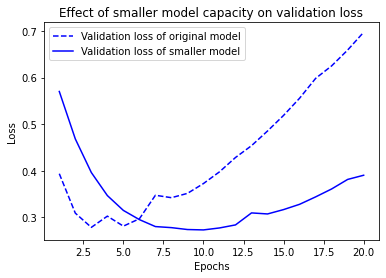

In [27]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#effect of validation loss of smaller model is overfitting and doesn't perform really good(curve not near 0)

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5449 - accuracy: 0.7465 - val_loss: 0.3032 - val_accuracy: 0.8791
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2571 - accuracy: 0.8957 - val_loss: 0.2788 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1550 - accuracy: 0.9384 - val_loss: 0.3987 - val_accuracy: 0.8350
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0883 - accuracy: 0.9692 - val_loss: 0.3138 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 1.1956 - val_accuracy: 0.7454
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.5375 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0365 - accuracy: 0.9963 - val_loss: 2.0834 - val_accuracy: 0.7286
Epoch 8/20
30

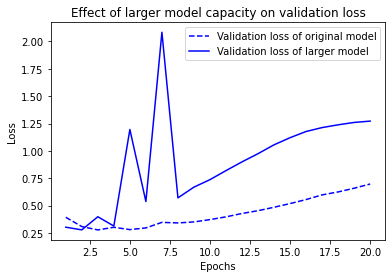

In [28]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#overfit really fastly. so validation loss of original model looks better. but still overfitting after 5 epochs

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6273 - accuracy: 0.7557 - val_loss: 0.5066 - val_accuracy: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4386 - accuracy: 0.8901 - val_loss: 0.4190 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3609 - accuracy: 0.9113 - val_loss: 0.3777 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3199 - accuracy: 0.9223 - val_loss: 0.3797 - val_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2960 - accuracy: 0.9290 - val_loss: 0.3724 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2786 - accuracy: 0.9363 - val_loss: 0.3722 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2697 - accuracy: 0.9348 - val_loss: 0.3626 - val_accuracy: 0.8867
Epoch 8/20
30

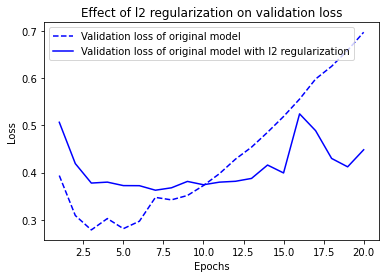

In [31]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of original model with l2 regularization")
plt.title("Effect of l2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#overfitting pb is prevented however loss is worst than original one

**Different weight regularizers available in Keras**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
#At testing time
#layer_output*=np.random.randint(0,high=2, size=layer_output.shape) #at training time drops out 50% of the units in the output
#layer_output*=0.5 

#at training time
#layer_output*=np.random.randint(0,high=2, size=layer_output.shape)
#layer_output/=0.5 #note that we're scalling up rather scaling down in this case.

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6257 - accuracy: 0.6373 - val_loss: 0.5041 - val_accuracy: 0.8395
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4934 - accuracy: 0.7887 - val_loss: 0.4014 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4159 - accuracy: 0.8416 - val_loss: 0.3333 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3535 - accuracy: 0.8764 - val_loss: 0.3001 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3034 - accuracy: 0.8957 - val_loss: 0.2896 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2671 - accuracy: 0.9146 - val_loss: 0.2825 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2358 - accuracy: 0.9265 - val_loss: 0.2868 - val_accuracy: 0.8914
Epoch 8/20
30

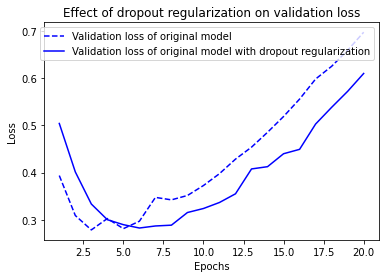

In [34]:
#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",#pour a avoir une courbe en pointillée
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-", #pour avoir une courbe pleine
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#look similar but with dropout look a bit better

## Summary